In [1]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_excel('GYMNASTICS_DATA.xlsx', sheet_name='ATTENDANCE')
df.head()

,UID,ACCOUNT_ID,ATHLETICS_EVENT_ID,ATHLETICS_EVENT_NAME,ATHLETICS_EVENT_DATE,SCAN_MINS_BEFORE_START,SCAN_TIME,SCAN_METHOD,SPORT_NAME,SEASON,ROW_NAME,SECTION_NAME,SEAT_NUMBER,TICKET_ACQUISITION_TYPE,PRICE,DISTANCE_TRAVELLED_IN_MILES
0,3131566,AFDE92EC7FF,260,Clemson v Pittsburgh,2024-02-27,NaN,NaT,NaN,Men's Basketball,2023,AA,140,5,Primary,20.32,115.672231
1,3131591,A843C37EE78,260,Clemson v Pittsburgh,2024-02-27,-4.0,2024-02-27 19:04:00,iOS AMGR,Men's Basketball,2023,K,140,7,Forward,22.82,NaN
2,3131722,A44084FFEA8,260,Clemson v Pittsburgh,2024-02-27,2.0,2024-02-27 18:58:00,iOS AMGR,Men's Basketball,2023,V,140,9,Primary,20.32,9.593700
3,3131765,AE3DBDBE376,260,Clemson v Pittsburgh,2024-02-27,32.0,2024-02-27 18:28:00,Mobile web TM,Men's Basketball,2023,Z,140,5,Forward,20.32,4.367780
4,3131821,A3DD3E0FD4F,260,Clemson v Pittsburgh,2024-02-27,23.0,2024-02-27 18:37:00,iOS AMGR,Men's Basketball,2023,G,201,10,Forward,20.00,NaN


In [3]:
len(np.unique(df['ACCOUNT_ID']))

29441

In [4]:
df['SPORT_NAME'].value_counts()

Baseball              106482
Men's Basketball       75276
Women's Gymnastics     43498
Softball               40440
Women's Basketball      7890
Women's Lacrosse        7408
Name: SPORT_NAME, dtype: int64

----------Number of Customers scanned into a meet----------

In [5]:
df_gymnastics = df[df['SPORT_NAME'] == 'Women\'s Gymnastics']
df_gymnastics_scanned = df_gymnastics[df_gymnastics['SCAN_METHOD'].notna()]
customers_scanned = len(df_gymnastics_scanned)
customers_scanned

27606

In [6]:
df_gymnastics_scanned['ATHLETICS_EVENT_NAME'].value_counts()

Clemson v Air Force         5986
Clemson v North Carolina    5906
Clemson v NC State          5673
Clemson v Pittsburgh        5529
Clemson v William & Mary    4512
Name: ATHLETICS_EVENT_NAME, dtype: int64

The above result displays the number of customers scanned into each meet

---------- % of seats scanned, scanned in after the start----------

In [7]:
print("Percentage of seats scanned for each meet: ")
(df_gymnastics_scanned['ATHLETICS_EVENT_NAME'].value_counts()*100)/customers_scanned

Percentage of seats scanned for each meet: 


Clemson v Air Force         21.683692
Clemson v North Carolina    21.393900
Clemson v NC State          20.549880
Clemson v Pittsburgh        20.028255
Clemson v William & Mary    16.344273
Name: ATHLETICS_EVENT_NAME, dtype: float64

In [8]:
df_afterstart = df_gymnastics_scanned[df_gymnastics_scanned['SCAN_MINS_BEFORE_START']<0]
per_afterstart=(df_afterstart['ATHLETICS_EVENT_NAME'].value_counts() / df_gymnastics_scanned['ATHLETICS_EVENT_NAME'].value_counts())*100
print("Percentage of seats scanned after the start of event for each meet: ")
per_afterstart

Percentage of seats scanned after the start of event for each meet: 


Clemson v Air Force         12.763114
Clemson v NC State          21.928433
Clemson v North Carolina    12.834406
Clemson v Pittsburgh         8.808103
Clemson v William & Mary    22.805851
Name: ATHLETICS_EVENT_NAME, dtype: float64

----------Factors impacting customer attendance----------

In [9]:
# Adding Attendance column based on SCAN_TIME column

df_gym=df_gymnastics.copy()
df_gym.loc[:, 'ATTENDANCE'] = df_gym['SCAN_TIME'].notnull()
df_gym.head()

,UID,ACCOUNT_ID,ATHLETICS_EVENT_ID,ATHLETICS_EVENT_NAME,ATHLETICS_EVENT_DATE,SCAN_MINS_BEFORE_START,SCAN_TIME,SCAN_METHOD,SPORT_NAME,SEASON,ROW_NAME,SECTION_NAME,SEAT_NUMBER,TICKET_ACQUISITION_TYPE,PRICE,DISTANCE_TRAVELLED_IN_MILES,ATTENDANCE
23887,3447332,A91C6ED50F8,319,Clemson v North Carolina,2024-02-23,57.0,2024-02-23 18:33:00,Android AMGR App,Women's Gymnastics,2023,10,GA09,47,Primary,5.0,13.893945,True
23994,3447333,A91C6ED50F8,319,Clemson v North Carolina,2024-02-23,57.0,2024-02-23 18:33:00,Android AMGR App,Women's Gymnastics,2023,10,GA09,48,Primary,5.0,13.893945,True
24078,3447144,A02169A0F51,319,Clemson v North Carolina,2024-02-23,14.0,2024-02-23 19:16:00,iOS AMGR,Women's Gymnastics,2023,3,GA08,12,Primary,5.0,36.875588,True
24079,3447147,AFFD229FB96,319,Clemson v North Carolina,2024-02-23,51.0,2024-02-23 18:39:00,iOS AMGR App,Women's Gymnastics,2023,3,GA08,15,Primary,5.0,10.068403,True
24118,3447150,AFFD229FB96,319,Clemson v North Carolina,2024-02-23,NaN,NaT,NaN,Women's Gymnastics,2023,3,GA08,18,Primary,5.0,10.068403,False


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Replaceing unknown distance values with average distance for proper analysis
mean_distance = df_gym['DISTANCE_TRAVELLED_IN_MILES'].mean()
df_gym['DISTANCE_TRAVELLED_IN_MILES'].fillna(mean_distance, inplace=True)

#Performing one hot encoding to convert categorical variables to numerical values
one_hot_encoded_data = pd.get_dummies(df_gym, columns = ['TICKET_ACQUISITION_TYPE'])
one_hot_encoded_data.head()

,UID,ACCOUNT_ID,ATHLETICS_EVENT_ID,ATHLETICS_EVENT_NAME,ATHLETICS_EVENT_DATE,SCAN_MINS_BEFORE_START,SCAN_TIME,SCAN_METHOD,SPORT_NAME,SEASON,ROW_NAME,SECTION_NAME,SEAT_NUMBER,PRICE,DISTANCE_TRAVELLED_IN_MILES,ATTENDANCE,TICKET_ACQUISITION_TYPE_Comp,TICKET_ACQUISITION_TYPE_Forward,TICKET_ACQUISITION_TYPE_Primary,TICKET_ACQUISITION_TYPE_Secondary
23887,3447332,A91C6ED50F8,319,Clemson v North Carolina,2024-02-23,57.0,2024-02-23 18:33:00,Android AMGR App,Women's Gymnastics,2023,10,GA09,47,5.0,13.893945,True,0,0,1,0
23994,3447333,A91C6ED50F8,319,Clemson v North Carolina,2024-02-23,57.0,2024-02-23 18:33:00,Android AMGR App,Women's Gymnastics,2023,10,GA09,48,5.0,13.893945,True,0,0,1,0
24078,3447144,A02169A0F51,319,Clemson v North Carolina,2024-02-23,14.0,2024-02-23 19:16:00,iOS AMGR,Women's Gymnastics,2023,3,GA08,12,5.0,36.875588,True,0,0,1,0
24079,3447147,AFFD229FB96,319,Clemson v North Carolina,2024-02-23,51.0,2024-02-23 18:39:00,iOS AMGR App,Women's Gymnastics,2023,3,GA08,15,5.0,10.068403,True,0,0,1,0
24118,3447150,AFFD229FB96,319,Clemson v North Carolina,2024-02-23,NaN,NaT,NaN,Women's Gymnastics,2023,3,GA08,18,5.0,10.068403,False,0,0,1,0


In [11]:
#Implementing RandomForest Classifier for calcuating feature importance

features = ['SEAT_NUMBER', 'PRICE', 'DISTANCE_TRAVELLED_IN_MILES','TICKET_ACQUISITION_TYPE_Comp','TICKET_ACQUISITION_TYPE_Forward', 'TICKET_ACQUISITION_TYPE_Primary', 'TICKET_ACQUISITION_TYPE_Secondary']
X = one_hot_encoded_data[features]
y = one_hot_encoded_data['ATTENDANCE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature Importance of the factors affecting customer attendance:

DISTANCE_TRAVELLED_IN_MILES          0.700385
SEAT_NUMBER                          0.136072
PRICE                                0.101781
TICKET_ACQUISITION_TYPE_Comp         0.034149
TICKET_ACQUISITION_TYPE_Forward      0.015419
TICKET_ACQUISITION_TYPE_Primary      0.010531
TICKET_ACQUISITION_TYPE_Secondary    0.001663
dtype: float64


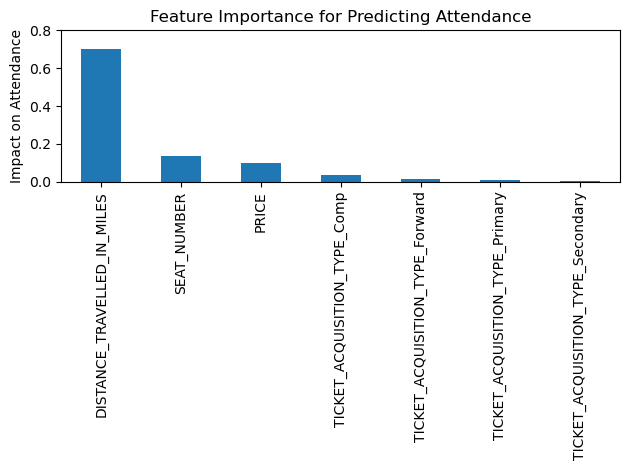

<Figure size 1000x600 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

# Feature importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance of the factors affecting customer attendance:\n")
print(feature_importance)

fig, ax = plt.subplots()
feature_importance.plot.bar(ax=ax)
ax.set_title("Feature Importance for Predicting Attendance")
ax.set_ylabel("Impact on Attendance")
ax.set_ylim(0, 0.8)  # Set y-limit to 0 and 1
fig.tight_layout()
plt.xticks(rotation=90)
plt.figure(figsize=(10, 6))
plt.show()

Permutation Importance of the factors affecting customer attendance:

DISTANCE_TRAVELLED_IN_MILES: 0.08298084291187736
PRICE: 0.06755938697318002
TICKET_ACQUISITION_TYPE_Comp: 0.04930651340996165
SEAT_NUMBER: 0.03624904214559382
TICKET_ACQUISITION_TYPE_Forward: 0.003333333333333277
TICKET_ACQUISITION_TYPE_Secondary: -0.00011494252873567682
TICKET_ACQUISITION_TYPE_Primary: -0.0011839080459770594


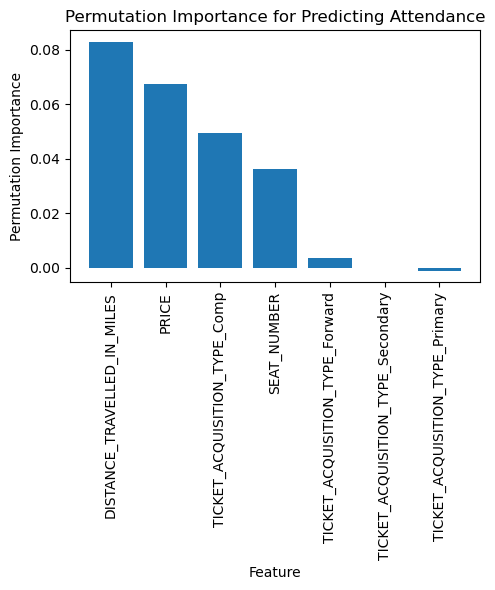

In [13]:
#Permutation Importance

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)
feature_importance1 = perm_importance.importances_mean

feature_importance_combined = list(zip(features, feature_importance1))
sorted_feature_importance = sorted(feature_importance_combined, key=lambda x: x[1], reverse=True)        
print("Permutation Importance of the factors affecting customer attendance:\n")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

sorted_indices = (-feature_importance1).argsort()  # Sorting indices in descending order
sorted_features = X.columns[sorted_indices]
sorted_importance = feature_importance1[sorted_indices]

plt.figure(figsize=(5, 6))  # Adjust the figsize as needed
plt.bar(sorted_features, sorted_importance)
plt.title('Permutation Importance for Predicting Attendance')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjusts the layout to prevent overlapping
plt.show()

From both Feature and Permutaion importance, it is clear that "DISTANCE_TRAVELLED_IN_MILES" had the biggest impact on customer attendance followed by "SEAT_NUMBER" and "PRICE"